In [3]:
import pandas as pd
from pandas_plink import read_plink1_bin
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

In [4]:
expression = pd.read_csv("/projects/ps-renlab2/sux002/DSC180/data/ef_md_test_01/DATA/Whole_Blood.v8.normalized_expression.bed", delimiter='\t')

In [5]:
G = read_plink1_bin("/projects/ps-renlab2/sux002/DSC180/data/ef_md_test_01/DATA/GTEx_v8_genotype_EUR_HM3.bed", "/projects/ps-renlab2/sux002/DSC180/data/ef_md_test_01/DATA/GTEx_v8_genotype_EUR_HM3.bim", "/projects/ps-renlab2/sux002/DSC180/data/ef_md_test_01/DATA/GTEx_v8_genotype_EUR_HM3.fam", verbose=False)

In [6]:
gene_annot = pd.read_csv('/projects/ps-renlab2/sux002/DSC180/data/ef_md_test_01/DATA/gene_annotation.txt', delimiter='\t')
gene_annot

,ID,CHR,START,STOP,SYM,TYPE
0,DDX11L1,1,11868,13052,ENSG00000223972,transcribed_unprocessed_pseudogene
1,OR4F5,1,69090,70008,ENSG00000186092,protein_coding
2,FAM87B,1,817370,819834,ENSG00000177757,lincRNA
3,LINC00115,1,826205,827522,ENSG00000225880,lincRNA
4,LINC01128,1,827607,859446,ENSG00000228794,processed_transcript
...,...,...,...,...,...,...
20495,ARSA,22,50622753,50628179,ENSG00000100299,protein_coding
20496,SHANK3,22,50674414,50733298,ENSG00000251322,protein_coding
20497,ACR,22,50738195,50745334,ENSG00000100312,protein_coding
20498,RPL23AP82,22,50756947,50801309,ENSG00000184319,transcribed_unprocessed_pseudogene


In [7]:
G

<xarray.DataArray 'genotype' (sample: 715, variant: 1034897)>
dask.array<transpose, shape=(715, 1034897), dtype=float32, chunksize=(715, 1024), chunktype=numpy.ndarray>
Coordinates: (12/14)
  * sample   (sample) object 'GTEX-111CU' 'GTEX-111FC' ... 'GTEX-ZZPU'
  * variant  (variant) <U14 'variant0' 'variant1' ... 'variant1034896'
    fid      (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    iid      (sample) object 'GTEX-111CU' 'GTEX-111FC' ... 'GTEX-ZZPU'
    father   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    ...       ...
    chrom    (variant) object '1' '1' '1' '1' '1' ... '22' '22' '22' '22' '22'
    snp      (variant) object 'rs3131972' 'rs3131969' ... 'rs28729663'
    cm       (variant) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pos      (variant) int32 817341 818802 818954 ... 50772964 50774447 50780578
    a0       (variant) object 'G' 'G' 'C' 'T' 'A' 'G' ... 'A' 'G' 'C' 'C' 'A'
    a1       (variant) object 'A' 'A' 'T' 'C' 'G' 'A' ... 'G' 'A' 'T' 'A' 'G'

In [8]:
expression['gene'] = [i[0] for i in expression['gene_id'].str.split('.')]
expression

,#chr,start,end,gene_id,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,GTEX-117XS,...,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5,gene
0,chr1,29552,29553,ENSG00000227232.5,-1.225024,-0.853391,0.429361,0.853391,-0.706494,1.290949,...,-1.135099,-0.479065,-0.170799,-1.079918,0.148098,0.372677,0.948702,-0.517128,0.765266,ENSG00000227232
1,chr1,129222,129223,ENSG00000238009.6,-0.673318,0.121709,-0.654690,-1.178870,-0.837370,-0.289783,...,0.231802,1.060053,0.925522,-0.167010,0.673318,0.555955,-0.716116,-0.600107,-0.321097,ENSG00000238009
2,chr1,131024,131025,ENSG00000233750.3,0.301491,0.858780,-0.437569,-1.558035,-0.770282,-1.698472,...,-1.241002,0.013075,0.529981,-2.134683,-0.031758,2.614268,-1.509592,0.328973,0.151876,ENSG00000233750
3,chr1,135894,135895,ENSG00000268903.1,0.417104,0.376684,0.816338,-2.614268,-0.931270,-0.372677,...,-0.313240,-0.001868,0.429361,-1.558035,1.009019,1.114008,-1.100218,-0.356707,-0.065421,ENSG00000268903
4,chr1,137964,137965,ENSG00000269981.1,0.891654,0.309319,1.178870,-2.614268,-0.821562,-0.811136,...,-0.254890,-0.313240,0.372677,-1.883649,0.760269,0.396813,-1.862071,-0.372677,-0.274234,ENSG00000269981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,chrX,155669943,155669944,ENSG00000185973.10,0.251033,1.047038,-0.891654,-1.453624,-0.061677,-0.654690,...,0.376684,0.360690,0.525687,-1.241002,0.133007,1.509592,-0.755291,-0.050453,-0.336870,ENSG00000185973
20311,chrX,155767811,155767812,ENSG00000168939.11,0.682720,2.099561,-0.305403,-0.258751,-0.659325,-1.698472,...,2.134683,-0.031758,1.596922,-1.186387,0.842686,1.178870,-1.265581,0.174591,0.352728,ENSG00000168939
20312,chrX,155881292,155881293,ENSG00000124333.15,0.560321,0.730675,-0.765266,0.258751,0.500121,-1.453624,...,-0.591185,1.464454,1.047038,-0.356707,0.129239,0.687444,-0.931270,0.504359,0.278115,ENSG00000124333
20313,chrX,155997580,155997581,ENSG00000124334.17,-1.021528,-1.047038,-0.170799,0.716116,-0.110426,0.645460,...,0.243330,-0.421183,-0.914116,0.167010,-0.282000,-1.002823,1.714493,0.332919,0.388743,ENSG00000124334


In [9]:
## Looking for overlap of population between bfiles and gene expresion data

pop_bfile = np.array(G.sample)
pop_gene_exp = np.array(expression.columns)

overlap = np.intersect1d(pop_bfile, pop_gene_exp)

print('the length of the overlap is :', len(pop_gene_exp))

the length of the overlap is : 675


In [10]:
def cis_eQTL(window_size1, window_size2, gene_name, G_train, expression, gene_annotation):
    """
    Find cis-eQTLs for a specific gene within a given window size.
    
    Args:
        window_size (int): Window size in base pairs.
        gene_name (str): Name of the gene to analyze.
        G_train (pandas.DataFrame): Genotype data from PLINK files.
        expression (pandas.DataFrame): Expression data with samples as rows and genes as columns.
        gene_annotation (pandas.DataFrame): Annotation data with gene information (gene_name, start, end, chromosome).
    
    Returns:
        pandas.DataFrame: cis-eQTL results for the specified gene.
    """
    # Find the gene's start, end, and chromosome
    gene_info = gene_annotation[gene_annotation['SYM'] == gene_name]
    if gene_info.empty:
        raise ValueError(f"Gene {gene_name} not found in annotation data.")
    
    gene_start = gene_info.iloc[0]['START']
    gene_end = gene_info.iloc[0]['STOP']
    gene_chromosome = str(gene_info.iloc[0]['CHR'])
    
    
    # Define the window around the gene
    snp_start = gene_start - window_size1
    snp_end = gene_end + window_size2

    # Filter genotype data for SNPs within the window on the same chromosome
    snps_in_window = G_train.snp.loc[
        (G_train.snp['chrom'] == gene_chromosome) & 
        (G_train.snp['pos'] >= snp_start) & 
        (G_train.snp['pos'] <= snp_end)
    ]
    #return snps_in_window
    #if snps_in_window.empty:
    #    raise ValueError(f"No SNPs found within the window for gene {gene_name}.")
    a = np.array(G.iid)
    b = np.array(expression[expression['gene'] == gene_name].columns)
    overlap_id = np.intersect1d(a, b)
    
    snp = snps_in_window
    #selected_expression = expression[expression['gene'] == gene_name][np.array(G_train.fid)].T
    selected_expression = expression[expression['gene'] == gene_name][overlap_id].T
    filtered_snps = G_train.where(G_train['snp'].isin(np.array(snp)), drop=True)
    #filtered_snps_bfile = filtered_snps.compute()
    filtered_snps_bfile = filtered_snps
    _columns = np.array(filtered_snps_bfile.snp)
    _index = np.array(filtered_snps_bfile.sample)
    snp_df = pd.DataFrame(np.array(filtered_snps_bfile), index = _index, columns = _columns)
    entire_df = pd.merge(selected_expression, snp_df, left_index=True, right_index=True, how='inner')
    
    
    snp_position = pd.DataFrame({
        'SNP': G_train['snp'],  # The SNP column
        'position': G_train['pos']  # The SNP positions (base pair positions)
    })

    results = []

    for i in range(len(snp)):

        y = entire_df.iloc[:,0]

        x = entire_df[np.array(snp)[i]] 
        if len(np.unique(x)) == 1:
            print(f"Skipping SNP at index {i}: All x values are identical.")
            continue


        each_states = stats.linregress(x, y)
        results.append([np.array(snp)[i], each_states.slope, each_states.pvalue])
    
    results_df = pd.DataFrame(results, columns=["SNP", "Beta", "P-value"])
    results_df = pd.merge(results_df, snp_position, on='SNP')
    
    return results_df

In [11]:
cis_aoe = cis_eQTL(5000000,10000, 'ENSG00000130203', G,expression, gene_annot)
cis_aoe

,SNP,Beta,P-value,position
0,rs7256902,0.072476,0.721231,39907575
1,rs10422645,-0.051406,0.460274,39911014
2,rs12459958,-0.053986,0.448770,39913651
3,rs12460562,-0.066221,0.355502,39914180
4,rs10401972,-0.045093,0.467104,39917174
...,...,...,...,...
1397,rs769451,0.033185,0.920789,44907654
1398,rs439401,0.037967,0.550995,44911194
1399,rs445925,0.155474,0.090532,44912383
1400,rs584007,0.043748,0.493925,44913221


In [12]:
def plot_locuszoom(result_position_df, pval_col='P-value', position_col='position', figsize=(10, 6)):
    """
    Generate a LocusZoom-style plot for eQTL analysis.
    
    Args:
        result_position_df (pd.DataFrame): DataFrame containing genomic positions and P-values.
        pval_col (str): Column name for P-values in the DataFrame. Default is 'P-value'.
        position_col (str): Column name for genomic positions in the DataFrame. Default is 'position'.
        figsize (tuple): Figure size for the plot. Default is (10, 6).
    """
    # Calculate -log10(P-value)
    result_position_df['-log10(P-value)'] = -np.log10(result_position_df[pval_col])
    
    # Create the plot
    plt.figure(figsize=figsize)
    plt.scatter(result_position_df[position_col], result_position_df['-log10(P-value)'], 
                c='blue', alpha=0.6)
    
    # Add labels, title, and grid
    plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
    plt.ylabel('-log10(P-value)', fontsize=12)
    plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)
    plt.grid(True)
    
    # Display the plot
    plt.show()

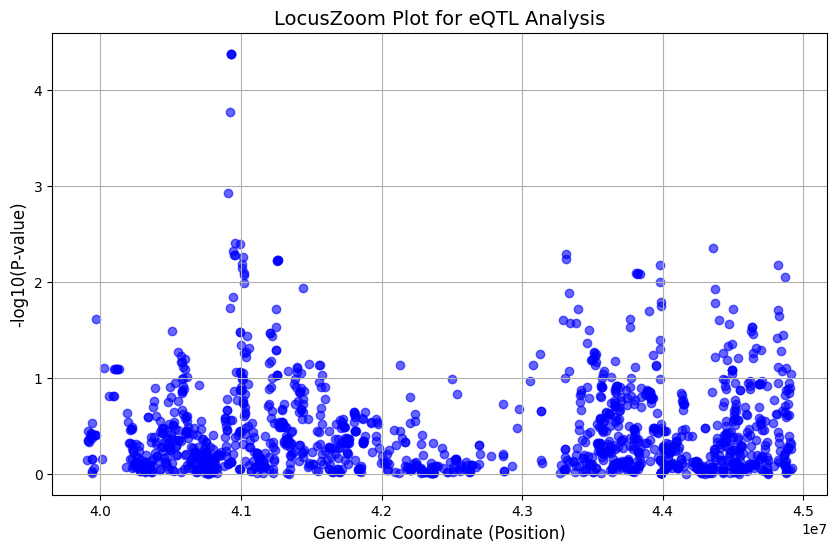

In [13]:
plot_locuszoom(cis_aoe)

In [16]:
cis_aoe.to_csv('/projects/ps-renlab2/sux002/DSC180/local_testing/result/eQTL_APOE_result.csv', sep='\t', index=False)